#### Ejemplo de Kalman con sistema Masa-Resorte-Amortiguador

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as co
from numpy.linalg import inv

#### Definición de Matrices

In [2]:
A = [[0, 1], [-1, -0.5]]
B = [[0], [10]]
C = [1, 0]
D = 0

#### Creación del sistema de estados

In [3]:
sys = co.ss(A, B, C, D)

#### Respuesta al escalón

In [4]:
t = np.linspace(0,20,1000)

In [5]:
t1, y1 = co.step_response(sys,t)

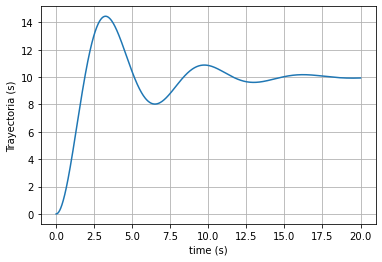

In [6]:
plt.plot(t1,y1)
plt.xlabel('time (s)')
plt.ylabel('Trayectoria (s)')
plt.grid()

### Kalman
Se utiliza un filtro contemple la posición y la velocidad del móvil. Utiliza un sensor para leer la posición.



In [195]:
tam_vec = 1000

In [196]:
y = y1 + np.random.rand(1000) #Señal con ruido

In [197]:
u = np.ones([1, tam_vec])

In [198]:
A = np.matrix([[0 ,1],
                [-1, -0.5]]) # F

In [199]:
B = np.matrix([[0 ],
                [10]]) # F

In [200]:
C = np.matrix([[1.,0.]]) # H

In [201]:
P = np.matrix([[1,0],
                [0, 1] ]) # Matriz de Covarianza, P

In [202]:
R = 0.05 # R

In [203]:
Q = np.matrix([[2.,0.],
                [0., 2.] ]) # Matriz de Covarianza, Q

In [204]:
gato = np.matrix([[1,0],
                [0, 1] ])
otro_gato = np.matrix([[0,0],
                [0, 0] ])


In [205]:
otro_gato = np.append(otro_gato,gato,axis=1)


Con estas matrices se procede al loop de predicción/actualización

In [235]:
#La señal con ruido es y(t)
#La señal sin ruido es y1(t)

x = np.zeros([2, 2])

for i in range (2, tam_vec):

#Predicción
#Por la forma en que se filtran los datos de "x", hay que trasponer a A.x para que quede de 2x1.
#De otra forma, no hay que trasponer a A.x

    xk = np.transpose(np.dot(A,x[:,i-1])) + B*u[:,i-1] 
    
    Pk = np.dot(np.dot(A,P[:,(i-2,i-1)]),np.transpose(A)) + Q

    
# Ganancia     
    K =  np.dot(np.dot(Pk,np.transpose(C)),inv(np.dot(np.dot(C,Pk),np.transpose(C))+R))      #Ganancia de Kalman

#Actualización
    x1 = xk + K * (y[i]-np.dot(C,xk))
    x = np.insert(x,i,[x1[0,0], x1[1,0]],axis=1)
    
    P1 = Pk - np.dot(K,np.dot(C,Pk))
    P = np.append(P,P1,axis=1)


In [236]:
x.shape

(2, 1000)

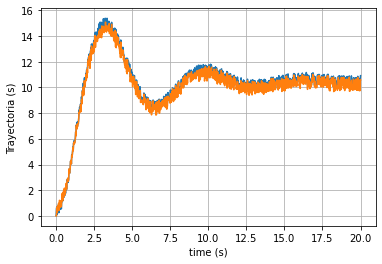

In [237]:
t = np.linspace(0,20,1000)

plt.plot(t1,y)    #Señal con ruido
#plt.plot(t1,y1)    #Señal sin ruido
plt.plot(t,x[0,:]) #Estimación Kalman

plt.xlabel('time (s)')
plt.ylabel('Trayectoria (s)')
plt.grid()

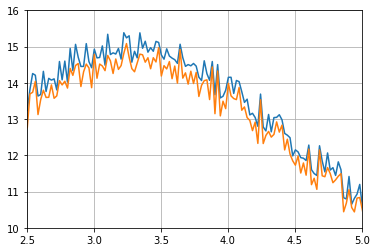

In [238]:
plt.plot(t1,y)    #Señal con ruido
plt.plot(t,x[0,:])
plt.xlim([2.5, 5]) 
plt.ylim([10, 16]) 
plt.grid()

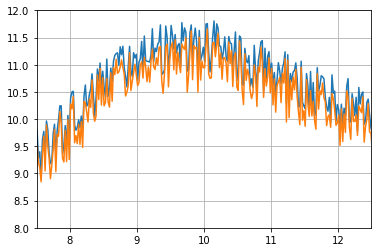

In [239]:
plt.plot(t1,y)    #Señal con ruido
plt.plot(t,x[0,:])
plt.xlim([7.5, 12.5]) 
plt.ylim([8, 12]) 
plt.grid()